# Detailed Exploration of Data, Preprocessing, Handling Insights, Model Training and Evaluation

In [34]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier # type: ignore

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading data
raw_path = "artifacts/raw/raw.csv"

df = pd.read_csv(raw_path)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.00,0,4716.00,2.17,816,28,2.50,0.00,0.00,1.00


In [36]:
columns = df.columns
print(columns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [37]:
df.shape

(10127, 23)

In [38]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00,10127.00
mean,739177606.33,46.33,2.35,35.93,3.81,2.34,2.46,8631.95,1162.81,7469.14,0.76,4404.09,64.86,0.71,0.27,0.16,0.84
std,36903783.45,8.02,1.30,7.99,1.55,1.01,1.11,9088.78,814.99,9090.69,0.22,3397.13,23.47,0.24,0.28,0.37,0.37
min,708082083.00,26.00,0.00,13.00,1.00,0.00,0.00,1438.30,0.00,3.00,0.00,510.00,10.00,0.00,0.00,0.00,0.00
25%,713036770.50,41.00,1.00,31.00,3.00,2.00,2.00,2555.00,359.00,1324.50,0.63,2155.50,45.00,0.58,0.02,0.00,1.00
50%,717926358.00,46.00,2.00,36.00,4.00,2.00,2.00,4549.00,1276.00,3474.00,0.74,3899.00,67.00,0.70,0.18,0.00,1.00
75%,773143533.00,52.00,3.00,40.00,5.00,3.00,3.00,11067.50,1784.00,9859.00,0.86,4741.00,81.00,0.82,0.50,0.00,1.00
max,828343083.00,73.00,5.00,56.00,6.00,6.00,6.00,34516.00,2517.00,34516.00,3.40,18484.00,139.00,3.71,1.00,1.00,1.00


In [39]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [40]:
df.isna().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.to_list()
print(categorical_columns)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [ ]:
for cols in categorical_columns:
    print(df[cols].value_counts())

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Gender
F    5358
M    4769
Name: count, dtype: int64
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [ ]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

# EDA

## Univariate Analysis

In [ ]:
data = df.copy()
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.00,777,11914.00,1.33,1144,42,1.62,0.06,0.00,1.00
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.00,864,7392.00,1.54,1291,33,3.71,0.10,0.00,1.00
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.00,0,3418.00,2.59,1887,20,2.33,0.00,0.00,1.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.00,2517,796.00,1.41,1171,20,2.33,0.76,0.00,1.00
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.00,0,4716.00,2.17,816,28,2.50,0.00,0.00,1.00


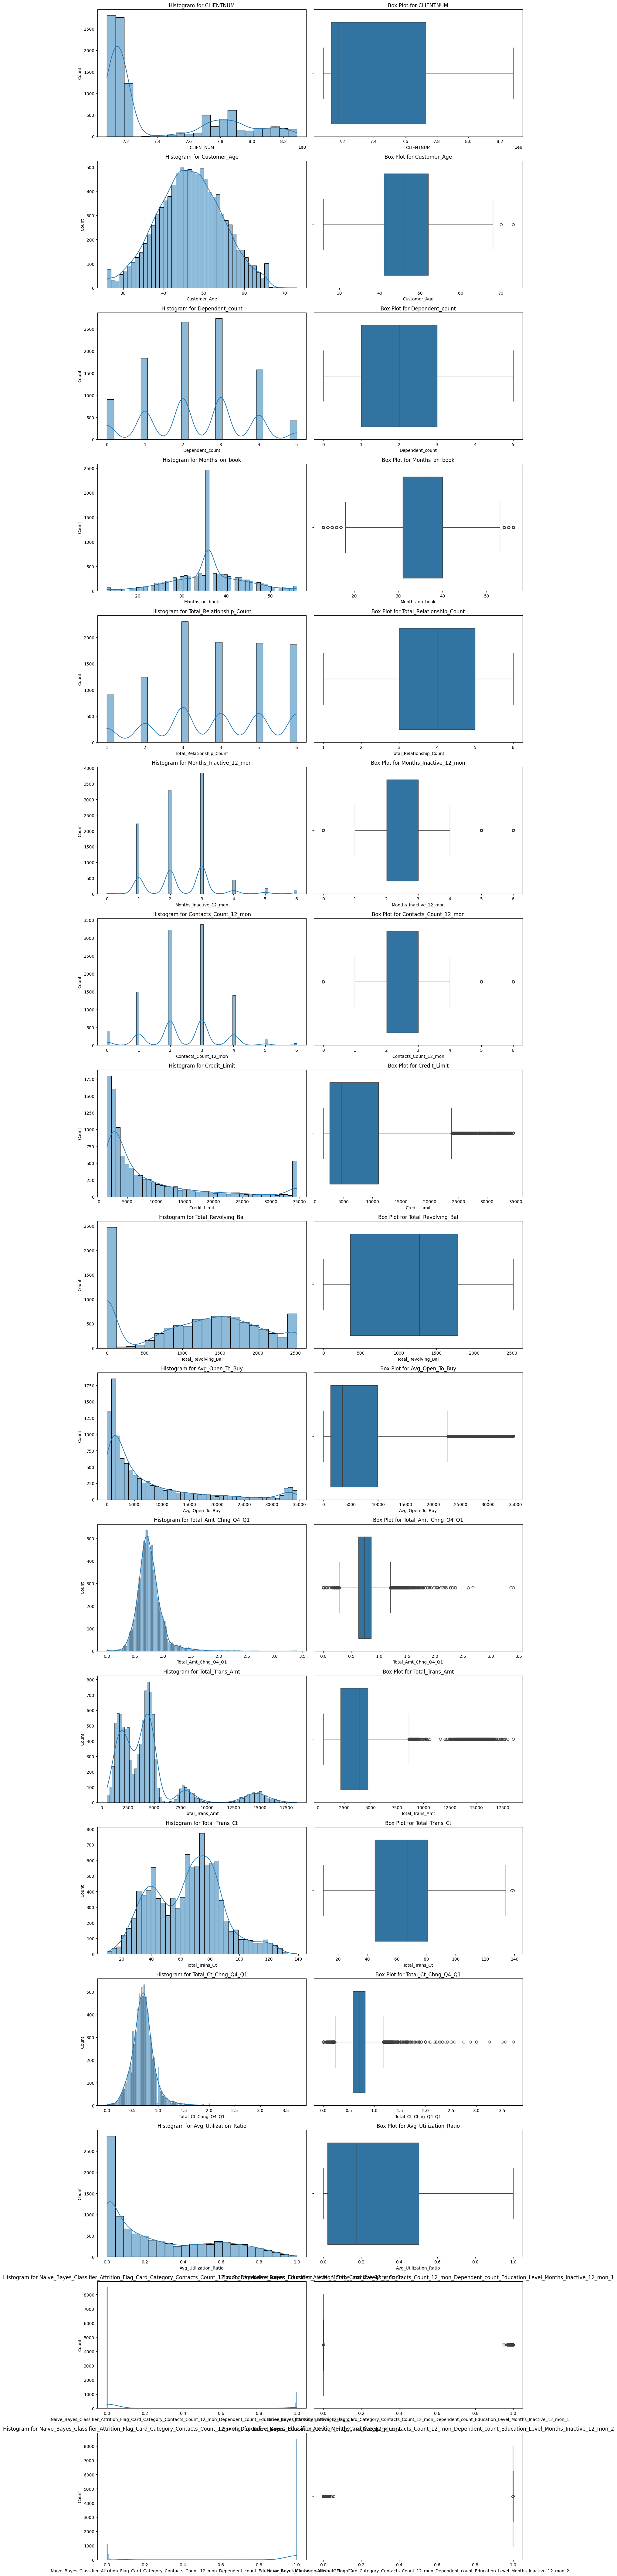

In [ ]:
def num_plot_dist(data, num_features):
    fig, axes = plt.subplots(len(num_features),2,figsize=(15, len(num_features)*5))
    if len(num_features)==1:
        axes=[axes]

    for i,column in enumerate(num_features):
        sns.histplot(data=df,x=column, ax=axes[i][0], kde=True)
        axes[i][0].set_title(f"Histogram for {column}")

        sns.boxplot(data=df, x=column, ax=axes[i][1])
        axes[i][1].set_title(f"Box Plot for {column}")

    plt.tight_layout()
    plt.show()

num_plot_dist(data=data,num_features=num_cols)

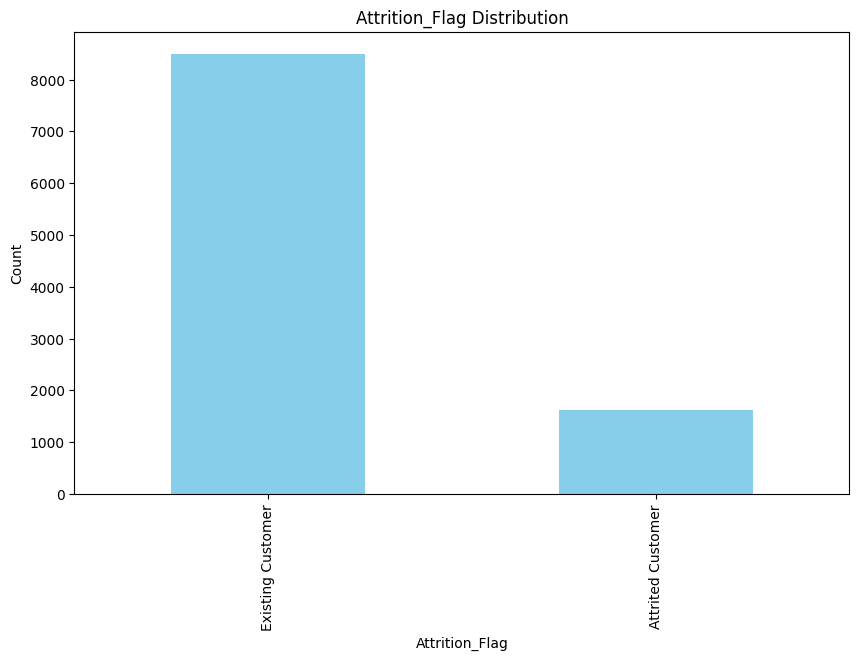

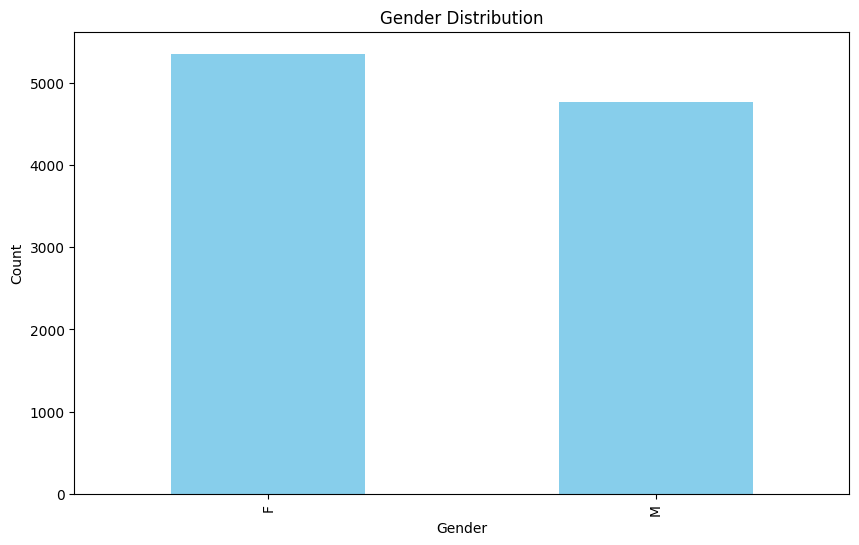

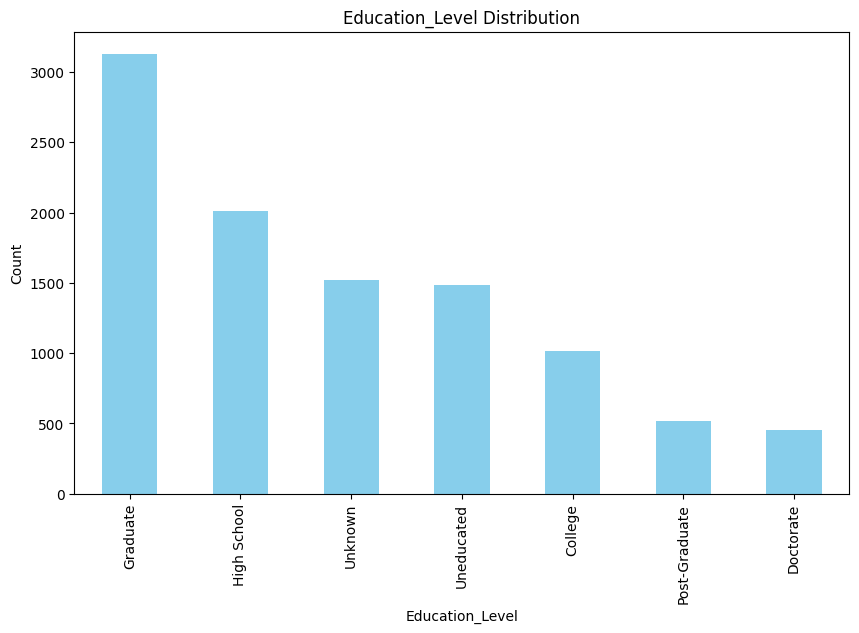

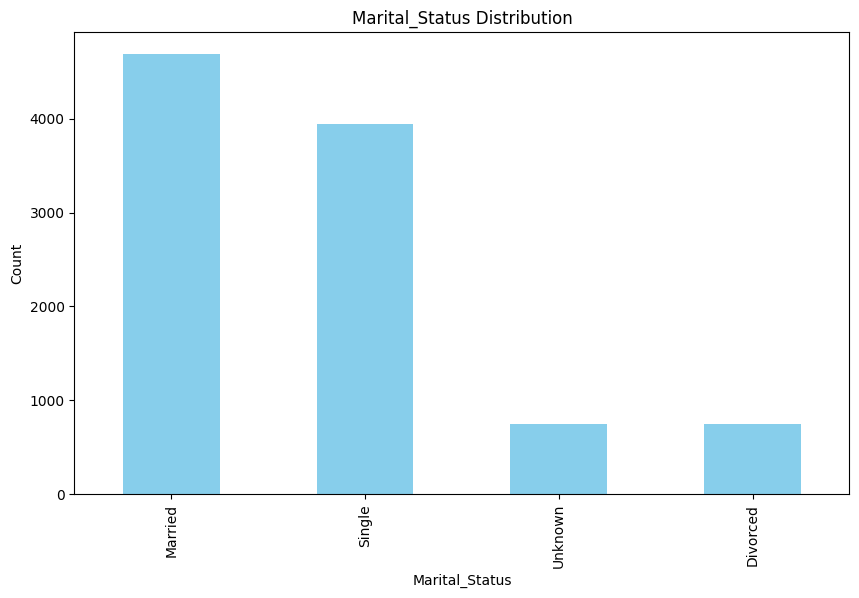

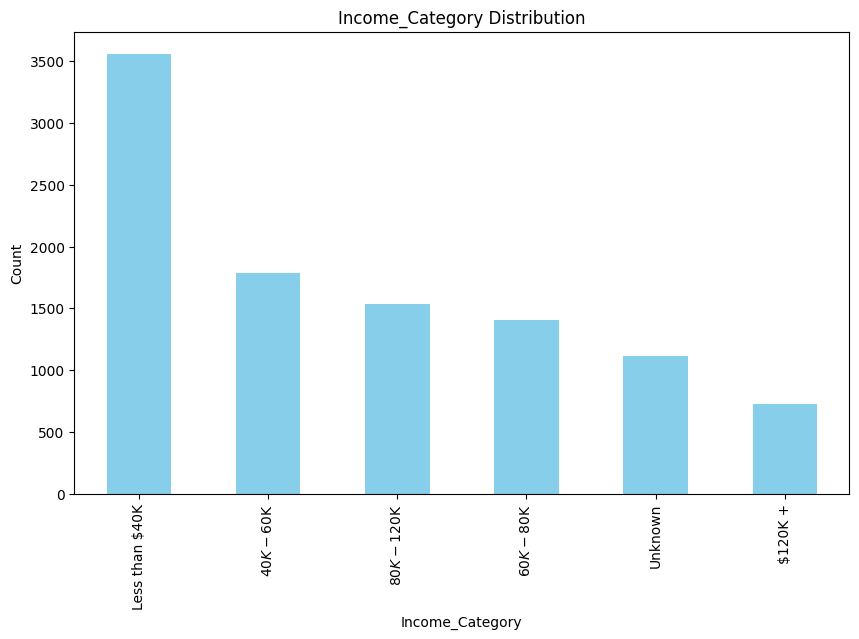

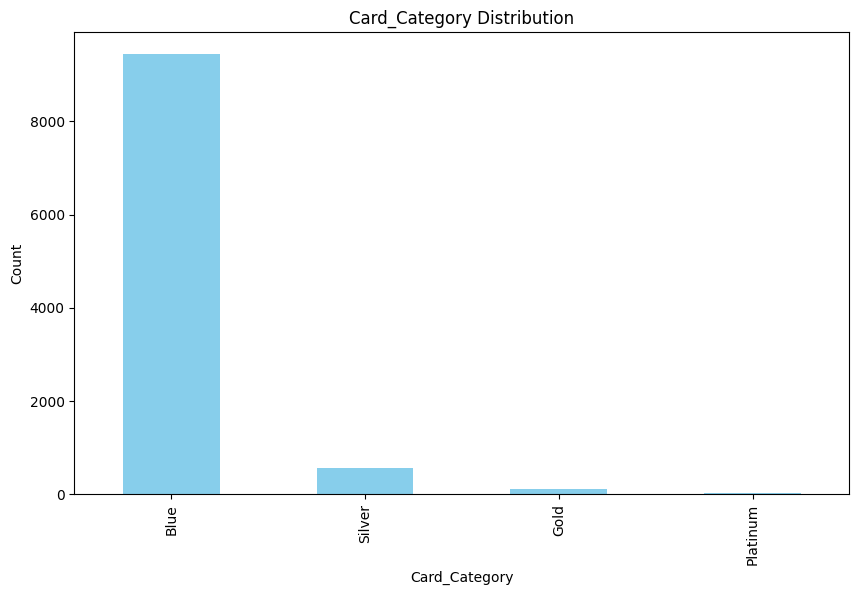

In [ ]:


for cat_feature in categorical_columns:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar' , color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()



#### Business Point Findings

Dataset is little bit imbalanced as there are less numbder of Atttrited Customers

There are more number of Blue Card Category People

A lot of people having less than 40K income are present

Almost all people are from similar age groups

There are lot of credit_limit ouliers

## Bivariate Analysis

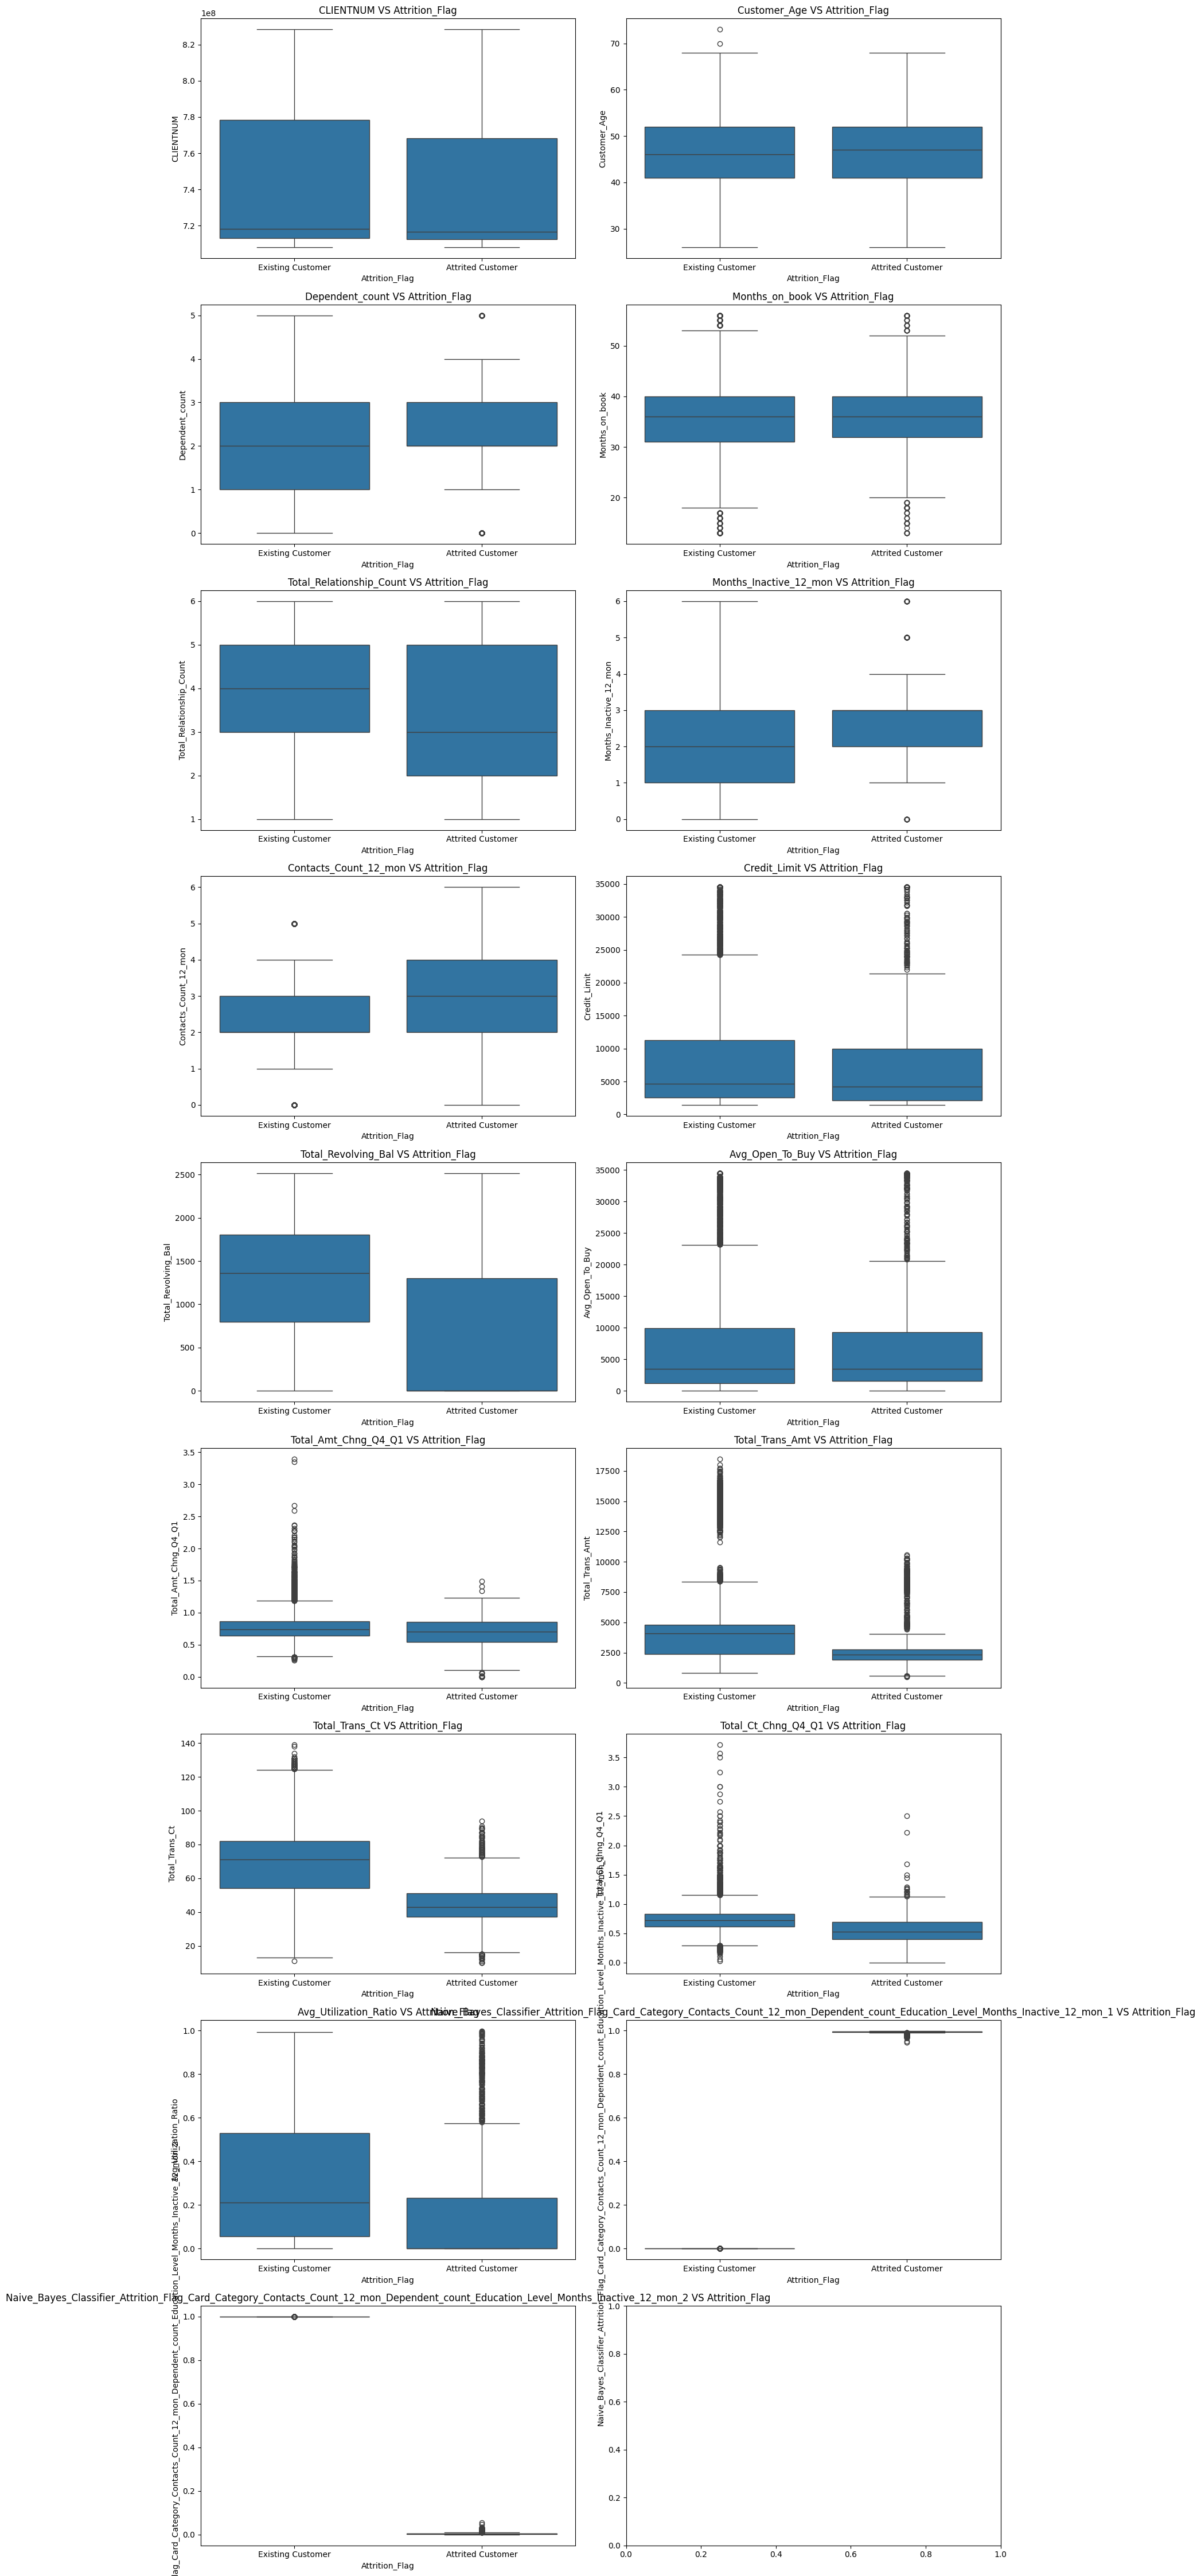

In [ ]:


def plot_bivariate_num(data, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15,num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features):
        sns.boxplot(x=target, y=column, ax=axes[i], data=data)
        axes[i].set_title(f"{column} VS {target}")

    plt.tight_layout()
    plt.show()

plot_bivariate_num(data=data, target= 'Attrition_Flag',num_features=num_cols)

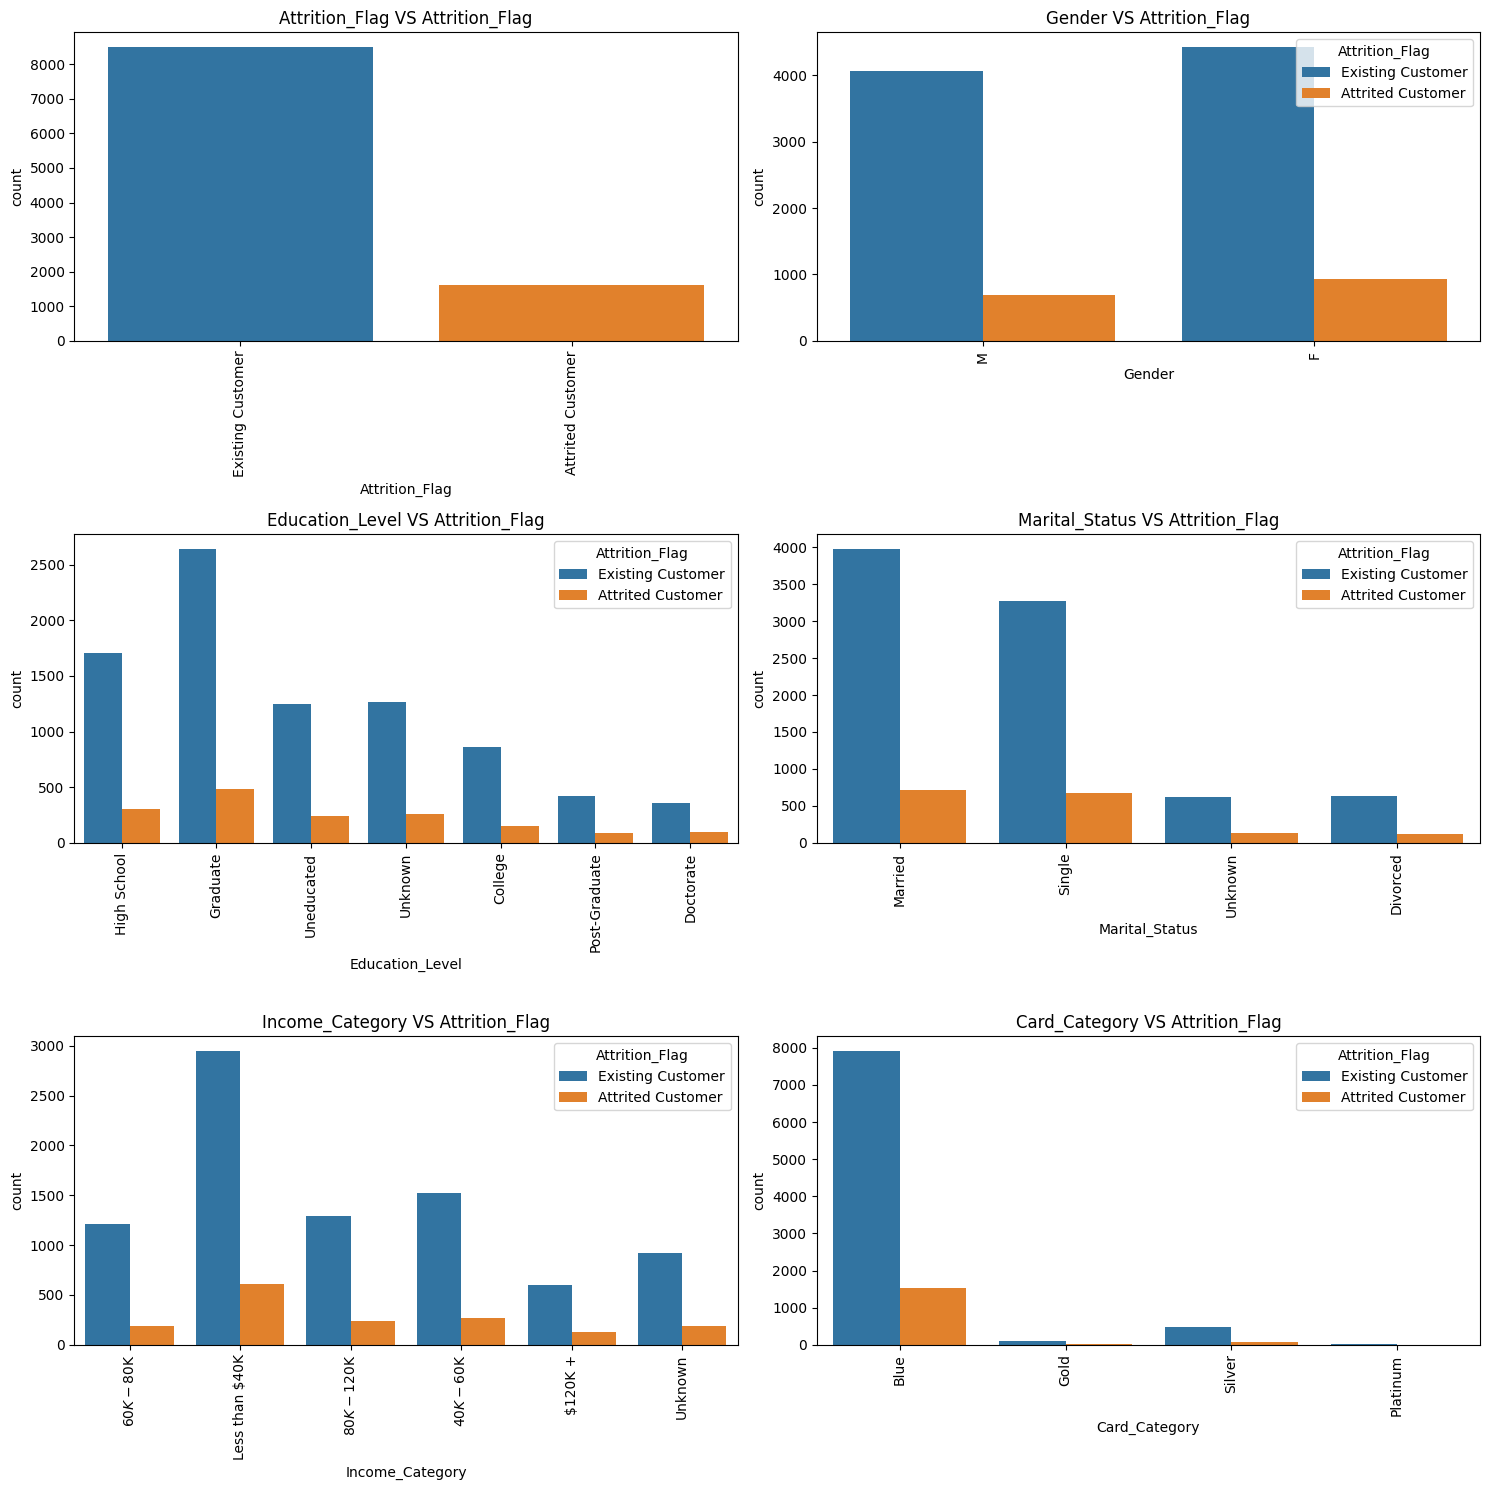

<Figure size 640x480 with 0 Axes>

In [ ]:


def plot_bivariate_cat(data, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

def plot_bivariate_cat(data, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features+1)//2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue = target, data=data, ax=axes[i])
        axes[i].set_title(f'{feature} VS {target}')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(x=feature, hue = target, data=data, ax=axes[i])
        axes[i].set_title(f'{feature} VS {target}')
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

plot_bivariate_cat(data=data,target='Attrition_Flag',cat_features=categorical_columns)

#### Buisness Point Findings

There are nearly equal number of Male and Female existing customers

There are lot of existing customers having < 40K income

Ouliers in Credit_limit

## Data Preprocessing and Feature Engineering

In [ ]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

df['Attrition_Flag'].value_counts()

Attrition_Flag
0    8500
1    1627
Name: count, dtype: int64

In [ ]:
# Gender: binary label encoding
df['Gender'] = df['Gender'].map({'M': 1, 'F': 0})

# Remaining categoric variables: OneHotEncoding
df = pd.get_dummies(df, columns=[
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category'
], drop_first=True)

In [ ]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,1,3,39,5,1,3,12691.00,...,False,False,False,True,False,False,False,False,False,False
1,818770008,0,49,0,5,44,6,1,2,8256.00,...,True,False,False,False,False,True,False,False,False,False
2,713982108,0,51,1,3,36,4,1,0,3418.00,...,False,False,False,False,True,False,False,False,False,False
3,769911858,0,40,0,4,34,3,4,1,3313.00,...,False,True,False,False,False,True,False,False,False,False
4,709106358,0,40,1,3,21,5,1,0,4716.00,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
x = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred = logreg.predict(x_test_scaled)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[1701    0]
 [   0  325]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1701
           1       1.00      1.00      1.00       325

    accuracy                           1.00      2026
   macro avg       1.00      1.00      1.00      2026
weighted avg       1.00      1.00      1.00      2026



The accuracy is 100%, something's wrong with the dataset, need feature engineering to cope up with data leakage

In [ ]:
df.corr(numeric_only=True)['Attrition_Flag'].sort_values(ascending=False)

Attrition_Flag                                                                                                                        1.00
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1    1.00
Contacts_Count_12_mon                                                                                                                 0.20
Months_Inactive_12_mon                                                                                                                0.15
Education_Level_Doctorate                                                                                                             0.03
Income_Category_Less than $40K                                                                                                        0.02
Marital_Status_Single                                                                                                                 0.02
Dependent_count            

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 

And

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2   -1.00

are highly correlated and are rresponsible for data leakage causing accuracy for 100%


### These were direct outputs of a pre-trained model embedded in the data and were causing artificially high accuracy (100%).

These contained probability predictions from a pre-trained Naive Bayes model that was included in the dataset. 

Since these columns almost directly encode the target label, they represent a textbook example of classic case of data leakage caused by embedded model outputs.

In [ ]:
# Dropping of Columns
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
    'CLIENTNUM'
],axis='columns')

df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,39,5,1,3,12691.00,777,...,False,False,False,True,False,False,False,False,False,False
1,0,49,0,5,44,6,1,2,8256.00,864,...,True,False,False,False,False,True,False,False,False,False
2,0,51,1,3,36,4,1,0,3418.00,0,...,False,False,False,False,True,False,False,False,False,False
3,0,40,0,4,34,3,4,1,3313.00,2517,...,False,True,False,False,False,True,False,False,False,False
4,0,40,1,3,21,5,1,0,4716.00,0,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
#redefine the feature matrix
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =42)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 1300, number of negative: 6801
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2030
[LightGBM] [Info] Number of data points in the train set: 8101, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160474 -> initscore=-1.654705
[LightGBM] [Info] Start training from score -1.654705
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.97               0.93     0.93      0.97   
XGBClassifier                      0.96               0.92     0.92      0.96   
RandomForestClassifier             0.96               0.90     0.90      0.96   
BaggingClassifier                  0.95               0.90     0.90      0.95   
DecisionTreeClassifier 

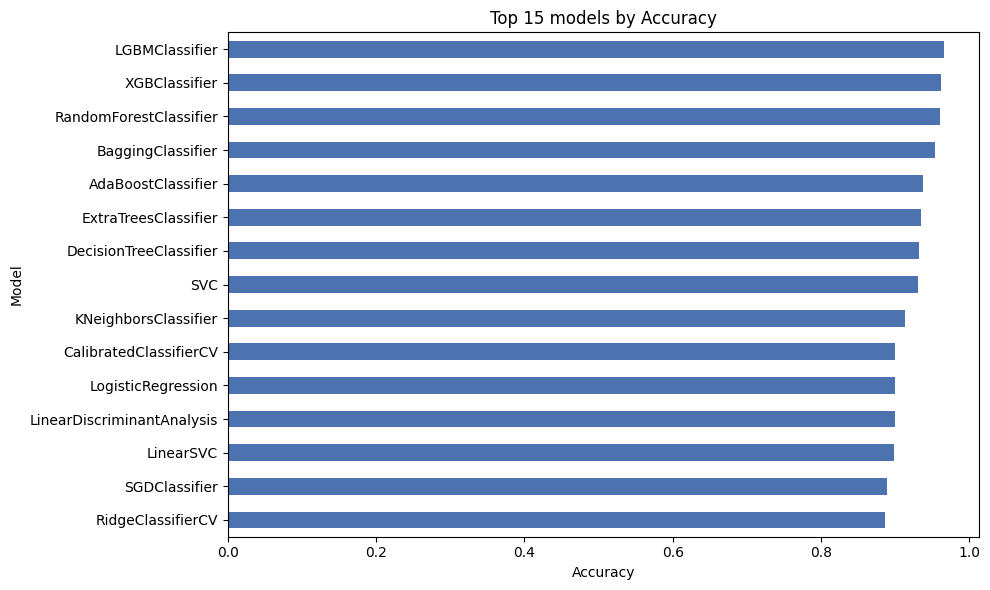

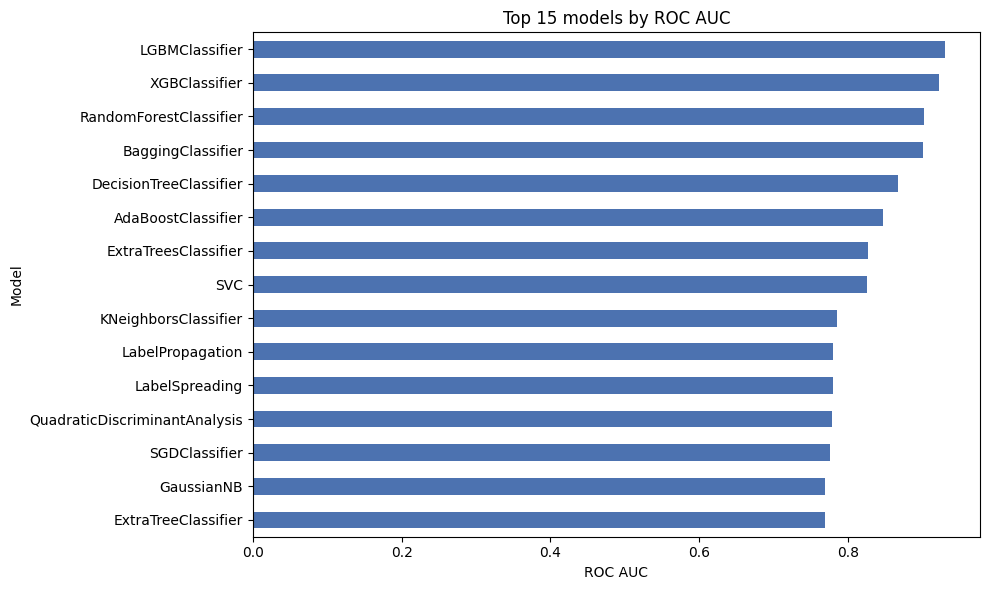

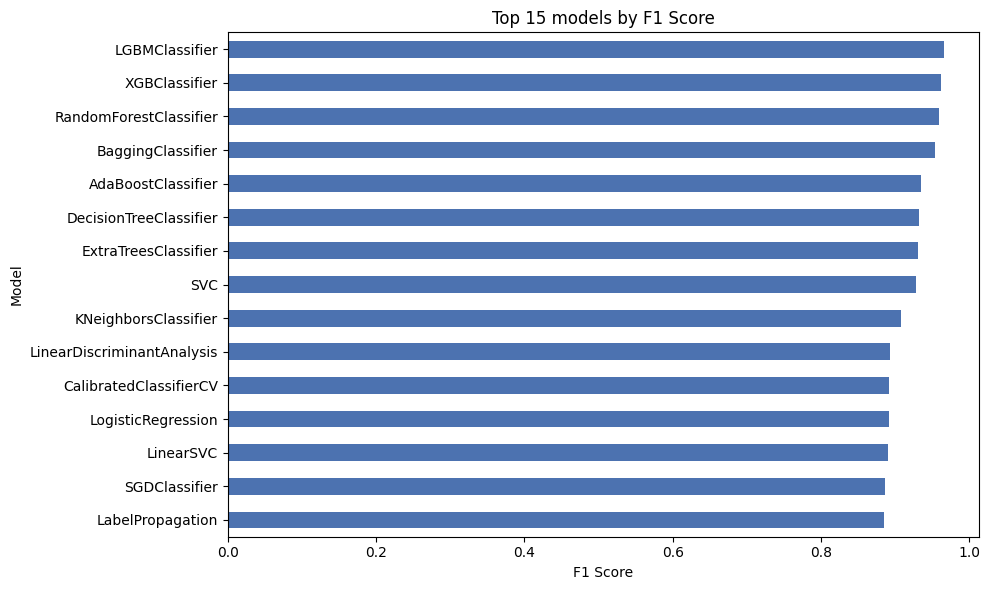

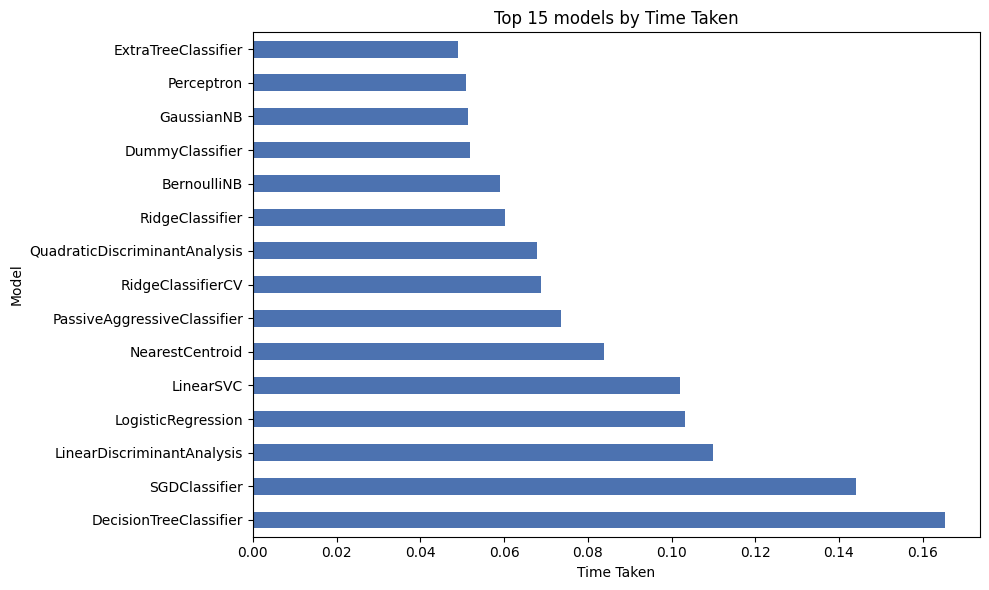

In [ ]:
metrics = ['Accuracy', 'ROC AUC', 'F1 Score', 'Time Taken']

for m in metrics:

    metric =  m     
    top_n = 15

    plot_df = models.sort_values(metric, ascending=(metric=="Time Taken")).head(top_n)

    plt.figure(figsize=(10, 6))
    plot_df[metric].iloc[::-1].plot(kind="barh", color="#4C72B0")  # reverse for descending top-down
    plt.xlabel(metric)
    plt.ylabel("Model")
    plt.title(f"Top {top_n} models by {metric}")
    plt.tight_layout()
    plt.show()

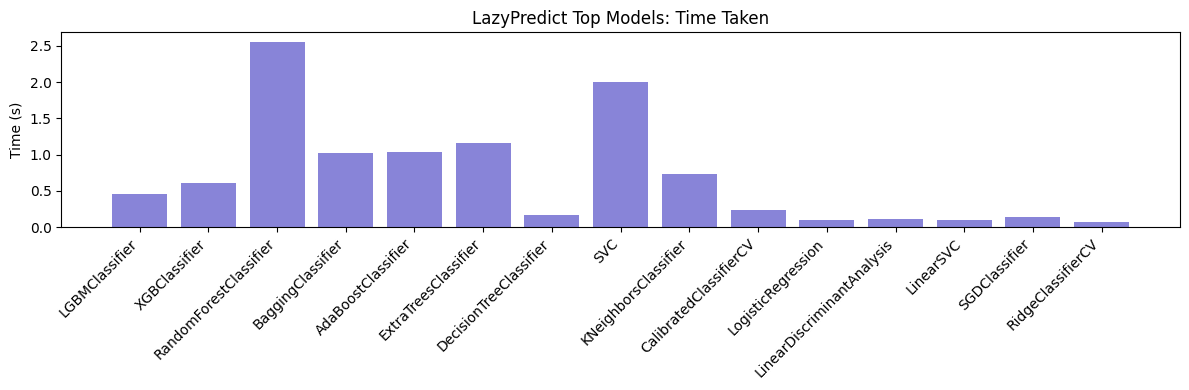

In [ ]:
labels = plot_df.index.tolist()
fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(labels, plot_df["Time Taken"].values, color="#8884d8")
ax.set_ylabel("Time (s)")
ax.set_title("LazyPredict Top Models: Time Taken")
ax.set_xticklabels(labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Model Selection

Looking at Time taken to train and all evaluatio  metric, we decide to go with LGBM Classifier

### Hyperparameter Tuning

In [48]:
import lightgbm as lgb

param_grid = {
    'num_leaves': [5, 20, 31],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150]
}

best_hyperparameters = {}
best_values = {}

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary', boosting_type='gbdt')

# Initialize GridSearchCV for hyperparameters
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
                           scoring='accuracy', cv=5)

# Fit the model to the training data to search for the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and their values
best_params = grid_search.best_params_
best_hyperparameters = list(best_params.keys())
best_values = list(best_params.values())

# Train a LightGBM model with the best hyperparameters
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Best hyperparameters:', best_hyperparameters)
print('Best values:', best_values)
print(f'Accuracy with best hyperparameters: {accuracy:.4f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1040, number of negative: 5440
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2056
[LightGBM] [Info] Number of data points in the train set: 6480, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.160494 -> initscore=-1.654558
[LightGBM] [Info] Start training from score -1.654558
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1040, number of negative: 5441
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

#### Best hyperparameters: ['learning_rate', 'n_estimators', 'num_leaves']
#### Best values: [0.2, 150, 20]
#### Accuracy with best hyperparameters: 0.9664